#### <font color="black"> <left> Fecha de Actualización:8/8/2023

# <font color="navy"> <center> Quantitative Asset Allocation

In [1]:
from functions import download_data, asset_allocation, backtesting
from visualizations import plot_backtesting

In [2]:
USA, MX="SPLG, ACWI, IXJ", "IUITN.MX"
benchmark="^GSPC"
start_date, end_date ="2021-01-01", "2022-01-01"

In [3]:
data_opt, data_benchmark_opt = download_data(tickers_USA=USA, tickers_MX=MX,benchmark=benchmark, 
                                    start_date=start_date, end_date=end_date).download()

[*********************100%***********************]  3 of 3 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
data_opt

,ACWI,IXJ,SPLG,IUITN.MX
Date,,,,
2021-01-04,1712.463916,1468.492092,828.236235,324.910004
2021-01-05,1738.393486,1483.247682,837.956331,324.910004
2021-01-06,1744.591759,1491.633136,840.862285,318.500000
2021-01-07,1741.035803,1484.592587,842.746284,320.510010
2021-01-08,1787.219251,1521.065588,862.899253,326.779999
...,...,...,...,...
2021-12-27,2129.512977,1825.156956,1128.774696,450.000000
2021-12-28,2135.195027,1827.865920,1131.748438,450.000000
2021-12-29,2133.187019,1834.892099,1132.392322,453.670013


In [5]:
data_benchmark_opt

,Adj Close
Date,
2021-01-04,3700.649902
2021-01-05,3726.860107
2021-01-06,3748.139893
2021-01-07,3803.790039
2021-01-08,3824.679932
...,...
2021-12-27,4791.189941
2021-12-28,4786.350098
2021-12-29,4793.060059


In [6]:
AA=asset_allocation(data_opt, data_benchmark_opt, .05)

In [7]:
weights_summary=AA.summary(20000)

In [8]:
weights_summary

Stocks,ACWI,IXJ,SPLG,IUITN.MX
Min Var,0.255419,0.476404,0.004998,0.263178
Max Sharpe,0.008201,0.014908,0.568166,0.408725
Semivariance,0.039694,0.015548,0.854529,0.090229
Omega,0.027866,0.028594,0.913448,0.030093


In [9]:
start_date, end_date ="2022-01-01", "2023-12-01"

In [10]:
data_backtesting, data_benchmark_backtesting = download_data(tickers_USA=USA, tickers_MX=MX,benchmark=benchmark, 
                                    start_date=start_date, end_date=end_date).download()

[*********************100%***********************]  3 of 3 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [11]:
BT=backtesting(weights_summary=weights_summary, data_stocks=data_backtesting,
               data_benchmark=data_benchmark_backtesting, cap_inicial=1000000)

In [12]:
evol=BT.history
evol.tail(5)

,Min Var,Max Sharpe,Semivariance,Omega,Benchmark
Date,,,,,
2023-08-07,"830,871.1003","836,012.3530","814,445.4592","809,442.2831","942,610.2431"
2023-08-08,"831,051.9074","829,695.3901","809,843.1444","805,343.8675","938,634.0463"
2023-08-09,"834,273.0690","831,200.4240","807,551.1797","802,402.2393","932,027.2543"
2023-08-10,"831,719.1163","829,820.3834","805,540.0404","800,224.8997","932,260.9265"
2023-08-11,"826,145.2000","821,922.1853","801,332.3059","796,780.2402","931,678.8851"


In [13]:
BT.metrics(rf=0.05)

,Annualized Return,Annualized Vol,Sharpe Ratio
Min Var,-0.1049,0.1724,-0.8984
Max Sharpe,-0.1029,0.2006,-0.7619
Semivariance,-0.1164,0.2120,-0.7850
Omega,-0.1183,0.2194,-0.7672
Benchmark,-0.0226,0.2089,-0.3475


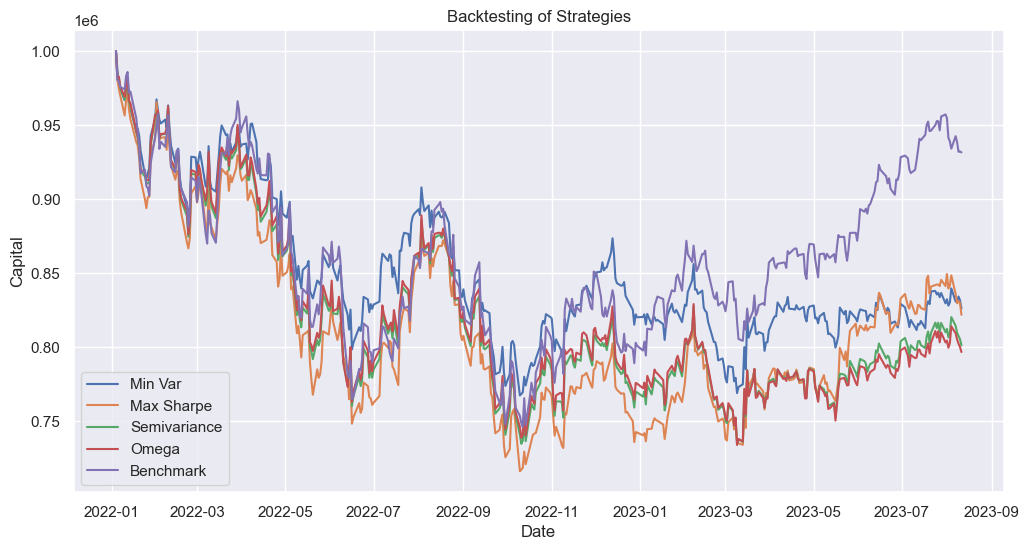

In [14]:
plot_backtesting(evol)